# K_means clustering
The goal of this project is to cluster songs based on their musical properties given by Spotify. 

## Loading standard libraries
Throughout the project we will make use of dataframes and visualization tools

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

# Preprocessing
In a first step we look at a list of about 1000 songs.

In [2]:
df_audio_features = pd.read_csv('data/df_audio_features_1000.csv', index_col = ['name', 'artist'])

In [3]:
#df_audio_features.info()

We see that the columns of the dataframe include categories like 'danceability', 'energy', which have a value between 0 and 1.
Some other properties like 'loudness' can have values between ~-44 and ~1. We might want to make use of this in our clustering algorithm, but to make sure all categories are fairly weighted, we will have to rescale in a preprocessing process.
Also there are some categories unlikely to be used in the clustering process. These include 'durations_ms', but also 'key' and 'mode' will be dropped, since these things are probably captured in the 'valence' category already.

In [4]:
df_audio_features.drop(columns=['key', 'mode', 'type', 'duration_ms', 'time_signature', 'id', 'html'], inplace=True)
#df_audio_features

## Different Scalers
Let's now import some different Scaler to see how our data will be scaled. As an example we only focus on the first column for now, which is danceability.
In a first step we look at the unscaled histogramm.

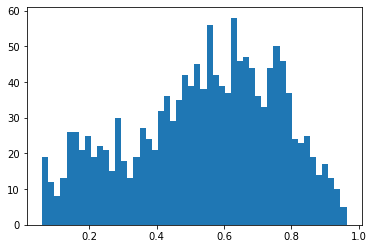

In [5]:
plt.hist(df_audio_features.iloc[:,0], bins=50)
plt.show()

We can see that most of the songs have a danceability between .4 and .8.
It is worth mentioning that not the whole range of the interval [0,1] is covered by our songs. 

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

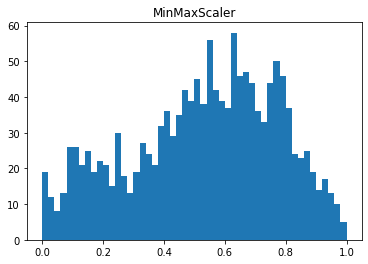

In [7]:
df_minmax = MinMaxScaler().fit_transform(df_audio_features)
df_minmax = pd.DataFrame(data=df_minmax, index = df_audio_features.index, columns = df_audio_features.columns)

plt.hist(df_minmax.iloc[:,0], bins=50)
plt.title('MinMaxScaler')
plt.show()

The MinMaxScaler transforms our values using the formula
$ x' = \displaystyle \frac{x- \min(x)}{\max(x)-\min(x)}$.

Therefore it makes sure that the range of values is $[0,1]$.

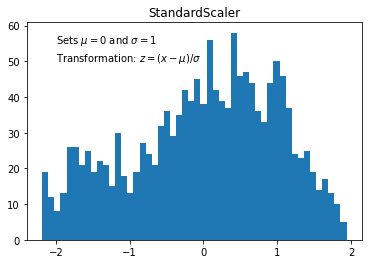

In [8]:
df_standard = StandardScaler().fit_transform(df_audio_features)
df_standard = pd.DataFrame(data=df_standard, index = df_audio_features.index, columns = df_audio_features.columns)

plt.hist(df_standard.iloc[:,0], bins=50)
plt.title('StandardScaler')
plt.text(-2,55,r'Sets $\mu = 0$ and $\sigma = 1$')
plt.text(-2,50, 'Transformation: $z = (x-\mu)/\sigma$')
plt.show()

The StandardScaler shifts the mean value to zero and scales the standard deviation to 1. So it resembles more a standard normal distribution. Note that the transformation is the same as calculating the z-score in statistics.

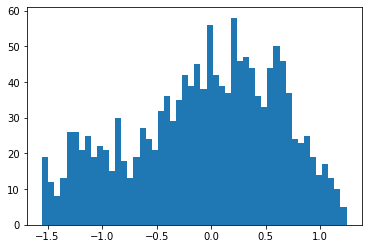

In [9]:
df_robust = RobustScaler().fit_transform(df_audio_features)
df_robust = pd.DataFrame(data=df_robust, index = df_audio_features.index, columns = df_audio_features.columns)

plt.hist(df_robust.iloc[:,0], bins=50)
plt.show()

The RobustScaler works more or less the same as the StandardScaler, but for the transformation the median and the (25,75)-quartile range is used. The scaled distribution is less affected by outliers. Hence the name 'Robust'.

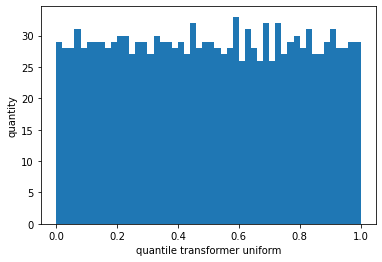

In [10]:
df_quantile = QuantileTransformer().fit_transform(df_audio_features)
df_quantile = pd.DataFrame(data=df_quantile, index = df_audio_features.index, columns = df_audio_features.columns)

plt.hist(df_quantile.iloc[:,0], bins=50)
plt.xlabel('quantile transformer uniform')
plt.ylabel('quantity')
plt.show()

The QuartileTransformer differs from the other Scalers, since this time a nonlinear transformation is used to create a uniform distribution. Distances are not displayed correctly anymore and possible outliers are concentrated at the edges of the distribution.

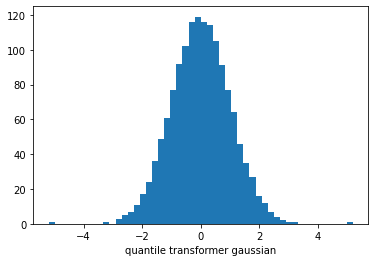

In [11]:
df_quantile_gauss = QuantileTransformer(output_distribution = 'normal').fit_transform(df_audio_features)
df_quantile_gauss = pd.DataFrame(data=df_quantile_gauss, index = df_audio_features.index, columns = df_audio_features.columns)

plt.hist(df_quantile_gauss.iloc[:,0], bins=50)
plt.xlabel('quantile transformer gaussian')
plt.show()

The QuartileTransformer also has the option to transform to look like a gaussian bell curve. This is also done using a nonlinear transformation. This might be helpful for later machine learning algorithms that rely on such distributions.

## Clustering

We are ready to cluster our data. We'll focus on MinMax for now.

In [12]:
from sklearn.cluster import KMeans

For initializing the model we want to pass the number of clusters we want to have. We'll set it to 4 for now and see what will happen.

In [13]:
my_kmeans = KMeans(n_clusters = 4)

In [14]:
# fit the data
my_kmeans.fit(df_minmax)
# obtain the cluster output
clusters = my_kmeans.predict(df_minmax) 
# attach the cluster output to our original DataFrame
df_audio_features["cl_minmax"] = clusters

In [15]:
#df_audio_features.groupby('cl_minmax').mean()

In [16]:
#centroids = my_kmeans.cluster_centers_
#centroids_df= pd.DataFrame(centroids)

In [17]:
import seaborn as sns

In [18]:
#sns.heatmap(centroids)
#plt.show()

In [19]:
#from sklearn.metrics import pairwise_distances
# Euclidean (by default)
#ecl_dis = pd.DataFrame(pairwise_distances(centroids_df), index=centroids_df.index, columns=centroids_df.index)

In [20]:
#sns.heatmap(ecl_dis)
#plt.show()

In [21]:
from src.plots import subplot_minmax, colortab

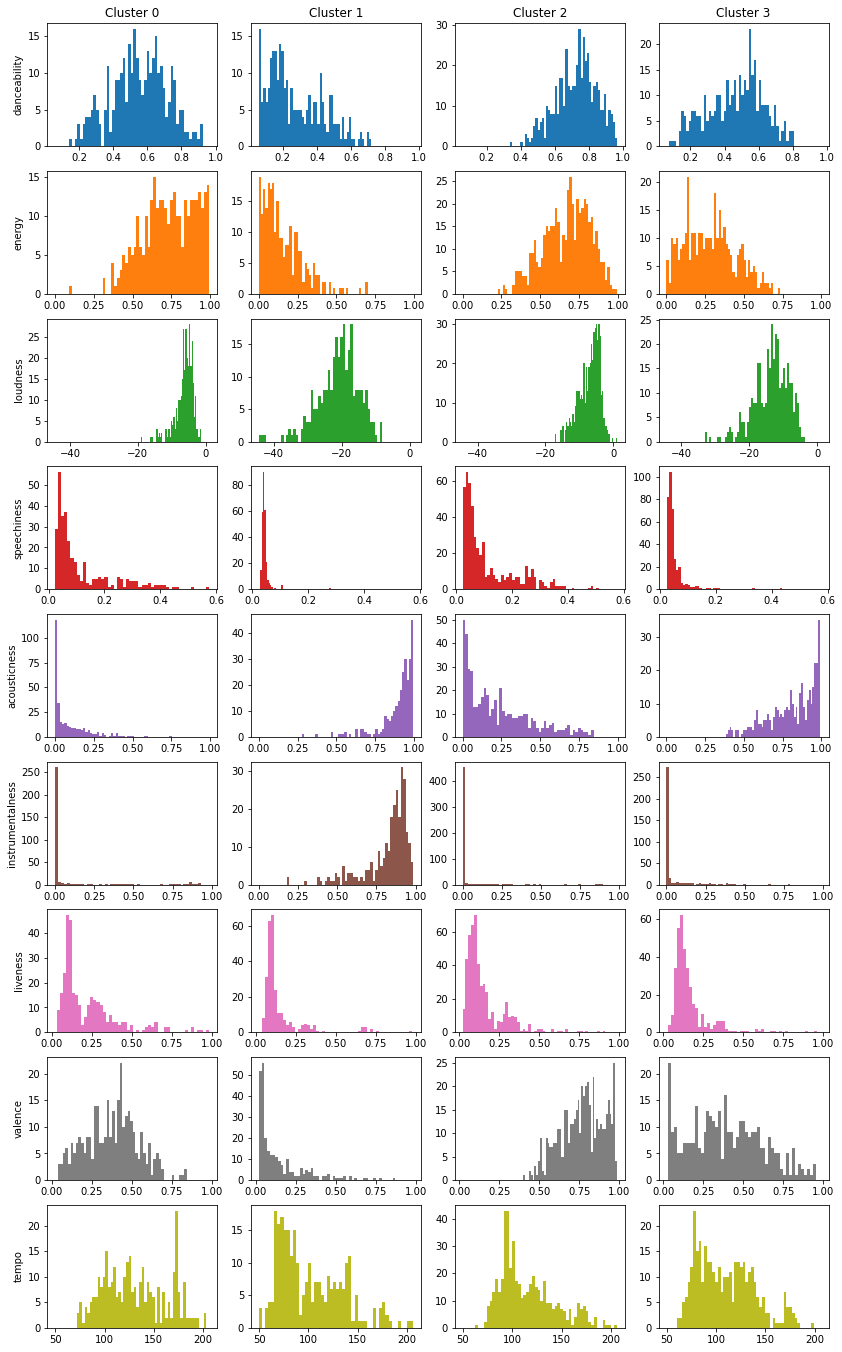

In [22]:
subplot_minmax(df_audio_features)